In [2]:
#loading library
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [3]:
def transformy(y):
    if y=='Iris-setosa':
        return 1
    else:
        return 0

def transformx(x):
    xx=np.random.rand(4).astype(float)
    j=0;
    for i in x:
        xx[j]=float(i)
        j+=1
    return xx;
data=np.genfromtxt("datasets/iris.csv",delimiter=',',dtype='str')
x=np.array(list(map(transformx,data[:,0:4])))
y=np.array(list(map(transformy,data[:,4])))


shape (150, 2) (4, 150)


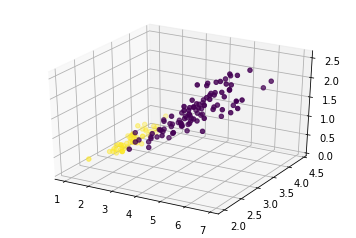

In [5]:
w=0.01*np.random.rand(4,2)
b=np.zeros((1,2));
step_size=1;
for i in range (100):
   
    scores=np.dot(x,w)+b
    num_examples=x.shape[0]
    exp_scores = np.exp(scores)
    #exp_scores
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    data_loss
    #reg=0.1;
    #reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss 

    dscores = probs
    if i==0:
        print("shape" ,dscores.shape,x.T.shape)
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    dscores
    dw= np.dot(x.T, dscores)
    
    db = np.sum(dscores, axis=0, keepdims=True)
    #print(dw,db)
    w += -step_size * dw
    b+=-step_size*db
    y_=np.zeros(y.shape[0])
    

y_=np.zeros(y.shape[0])
for i in range(y.shape[0]):
    y_[i]=np.argmax(exp_scores[i])
    #print(y[i],y_[i])
    

#plt.scatter(x[:, 1], x[:, 3], c=y_, s=50, cmap=plt.cm.Spectral)
#plt.show()
#plt.scatter(x[:, 1], x[:, 3], c=y, s=50, cmap=plt.cm.Spectral)
#plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,2], x[:,1],x[:,3],c=y_)
plt.show()